#### Attempting to invert the adversarial features stored in csv files

In [9]:
import csv
import numpy as np

utt="GaylandGGump-20141207-ksv-a0412"
#utt="1028-20100710-hne-ar-04"
#utt="Shyam-20121220-tyf-a0164"

base_path="./exp/tr_en_compr_64kbps_scaled0.7_ONLY_fbanks-Librosa_NO-cmvn_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_24.02.2020/decode_GPU_et_en_compr_64kbps_scaled0.7_ONLY_fbanks-Librosa_NO-cmvn_advEx_advex_conf_bsz10_MovWin_eps0.3_winsz4_str2_24.02.2020/csv_feats/"
advEx_path = base_path + utt + "_h_perturbed.csv"
#print(advEx_path)
with open(advEx_path) as fl:
    matrix = csv.reader(fl)
    orig_matrix = []
    for r_list in matrix:
        row = []
        for r in r_list[0].split(' '):
            if r:
                row.append(float(r))
        orig_matrix.append(row)
    orig_matrix = np.asarray(orig_matrix)
print("Shape of original AdvEx feature matrix read from .csv file is ",orig_matrix.shape)

Shape of original AdvEx feature matrix read from .csv file is  (544, 80)


/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Shape of linear spectrogram of Librosa AdvEx feats
(544, 257)
(86880,)


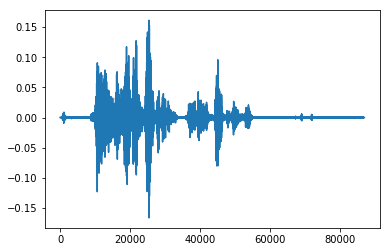

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, '/home/iustina/espnet/utils/')
sys.path.insert(0, '/home/iustina/espnet/')
import convert_fbank_to_wav

n_fft=512

##### Inverting the advEx features
linspc_advex = convert_fbank_to_wav.logmelspc_to_linearspc(orig_matrix, fs=16000, n_mels=80, n_fft=n_fft,
                                    fmin=80, fmax=7800)
print("Shape of linear spectrogram of Librosa AdvEx feats")
print(linspc_advex.shape)
wav_advex_inv = convert_fbank_to_wav.griffin_lim(linspc_advex, n_fft=n_fft, n_shift=160,                                                  win_length=n_fft, window='hann', n_iters=64)
print(wav_advex_inv.shape)
plt.figure(1)
wav_advex_inv_norm = wav_advex_inv * 32767 / np.max(np.abs(wav_advex_inv))
plt.plot(wav_advex_inv) ####### IT works !!!!!!!!!!!!!!!!!!


In [4]:
from scipy.io.wavfile import write

write(utt + "_advEx.wav", 16000, wav_advex_inv_norm.astype(np.int16))

Printing th original AdvEx features and the ones after inversion (orig features -> written audio ->  )

In [16]:
# First reload the prev written AdvEx wav
from scipy.io.wavfile import read
import librosa
reread_advEx_wav, _ = librosa.load(utt + "_advEx.wav")
wav_advex_scaled_max = wav_advex_inv / np.max(np.abs(wav_advex_inv))


In [18]:
print("Shape of advEx before being written to .wav - scaled only by max value: ", wav_advex_inv.shape)
print("Shape of advEx after reloading the reconstructed .wav file: \n", reread_advEx_wav.shape)
print("Audio advEx before being written to .wav - scaled only by max value: \n", wav_advex_scaled_max[1300:1350])
print("Audio advEx after reloading the reconstructed .wav file: \n", reread_advEx_wav[1300:1350])

print("Original AdvEx features: \n", orig_matrix[2:5,40:55])

Shape of advEx before being written to .wav - scaled only by max value:  (86880,)
Shape of advEx after reloading the reconstructed .wav file: 
 (119732,)
Audio advEx before being written to .wav - scaled only by max value: 
 [-1.1444282e-02 -1.7390272e-02 -9.5439218e-03 -1.1369848e-02
 -1.2086908e-02 -7.5165047e-03 -5.4057566e-03  1.2305761e-03
  4.1693007e-03  2.6034783e-03  1.1914615e-02  1.8364437e-02
  1.2702604e-02  1.2088062e-02  1.5874291e-02  1.4620564e-02
  1.4337538e-02  1.7402632e-02  1.0585568e-02 -2.0387194e-03
 -2.2799133e-03 -1.4746643e-03 -5.8392361e-03 -5.8534397e-03
 -1.1191344e-02 -1.4038183e-02 -8.8901166e-03 -1.1264077e-02
 -9.2065893e-03  2.3636619e-04 -1.9604920e-03 -7.9086130e-05
  9.1855349e-03  3.9470177e-03  7.5607779e-03  1.7684946e-02
  8.3090700e-03  5.4727541e-03  9.0953764e-03  4.0261564e-04
 -8.7354815e-04  2.3349079e-03 -4.1740444e-03 -3.4042571e-03
 -2.2846761e-03 -9.5437774e-03 -5.4023298e-03 -2.8859626e-03
 -8.7796682e-03 -2.2550537e-03]
Audio advEx